In [1]:
# Developing EOS code to include spectral encoding
# Standard python libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c, epsilon_0
from scipy.signal import find_peaks
inv_c = 1/c
from scipy.interpolate import interp1d
import sys
sys.path.insert(0, "/Users/keenan/Documents/GitHub/plasma-source/khuntstone/eos_bpm/python/")
# Custom modules
from crystal import crystal
import currents as cp
from laser import laser
import phase_retard as pr
import plotting as pl
import thz

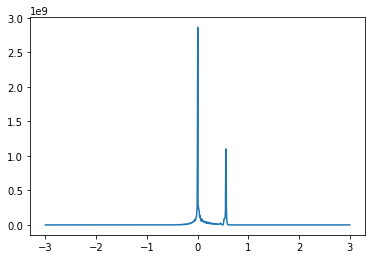

In [2]:
fpath = "/Users/keenan/Documents/Data/currents/"
I, ti, p2p = cp.get_current(204, fpath)
r0 = 1.5e-3
E, te = cp.get_E(I, ti, r0)
plt.plot(te*1e12, E)
plt.show()

In [3]:
tau   = np.linspace(-1000, 1000, 1000)*1e-15
setup = {"ctype" : "gap",
        "d"      : 100e-6,
        "y0"     : 800e-9,
        "tp"     : 30e-15,
        "angle"  : 0,
        "method" : "cross",
        "th"     : 0,
        "r0"     : r0,
        "nslice" : 100,
        "tau"    : tau,
        "t_delay": 0,
         "tc"    : 480e-15,
        "plot"   : True}

In [9]:
gp_setup = {"ctype" : "gap",
        "d"      : 100e-6,
        "y0"     : 800e-9,
        "tp"     : 30e-15,
        "angle"  : 0,
        "method" : "cross",
        "th"     : 0,
        "r0"     : r0,
        "nslice" : 100,
        "tau"    : tau,
        "t_delay": 0,
         "tc"    : 480e-15,
        "plot"   : True}
zn_setup = {"ctype" : "znte",
        "y0"     : 800e-9,
        "tp"     : 30e-15,
        "angle"  : 0,
        "method" : "cross",
        "th"     : 0,
        "r0"     : r0,
        "nslice" : 100,
        "tau"    : tau,
        "t_delay": 0,
         "tc"    : 480e-15,
        "plot"   : True}
ind = 100
sep = 1e-6
r0  = 1.75e-3
ds  = np.linspace(50, 500, 100)*1e-6
I, ti, p2p = cp.get_current(100, fpath)
E, te      = cp.get_E(I, ti, 1.75e-3)
gamma, tau = pr.eosd_delta(E, te, gp_setup)
peaks      = cp.get_peaks(np.sin(gamma), tau)
t0         = tau[peaks[0]]
sdiff      = np.zeros(len(ds))
smax       = np.zeros(len(ds))
for i in range(len(ds)):
    if (i+1)%10 == 0:
        print(i+1, "of", len(ds))
    zn_setup["d"] = ds[i]
    E1, te1 = cp.get_E(I, ti, r0 + sep)
    E2, te2 = cp.get_E(I, ti, r0 - sep)
    
    gamma1, tau1 = pr.eosd_delta(E1, te1, zn_setup)
    gamma2, tau2 = pr.eosd_delta(E2, te2, zn_setup)
    
    smax[i] = np.max([abs(np.sin(gamma1)), abs(np.sin(gamma2))])
    
    ind1 = np.argmin(abs(tau1-t0))
    ind2 = np.argmin(abs(tau2-t0))
    
    sig1 = np.sin(gamma1[ind1])
    sig2 = np.sin(gamma2[ind2])
    
    sdiff[i] = abs(sig1-sig2)/smax[i]

10 of 100
20 of 100
30 of 100
40 of 100
50 of 100
60 of 100
70 of 100
80 of 100
90 of 100
100 of 100


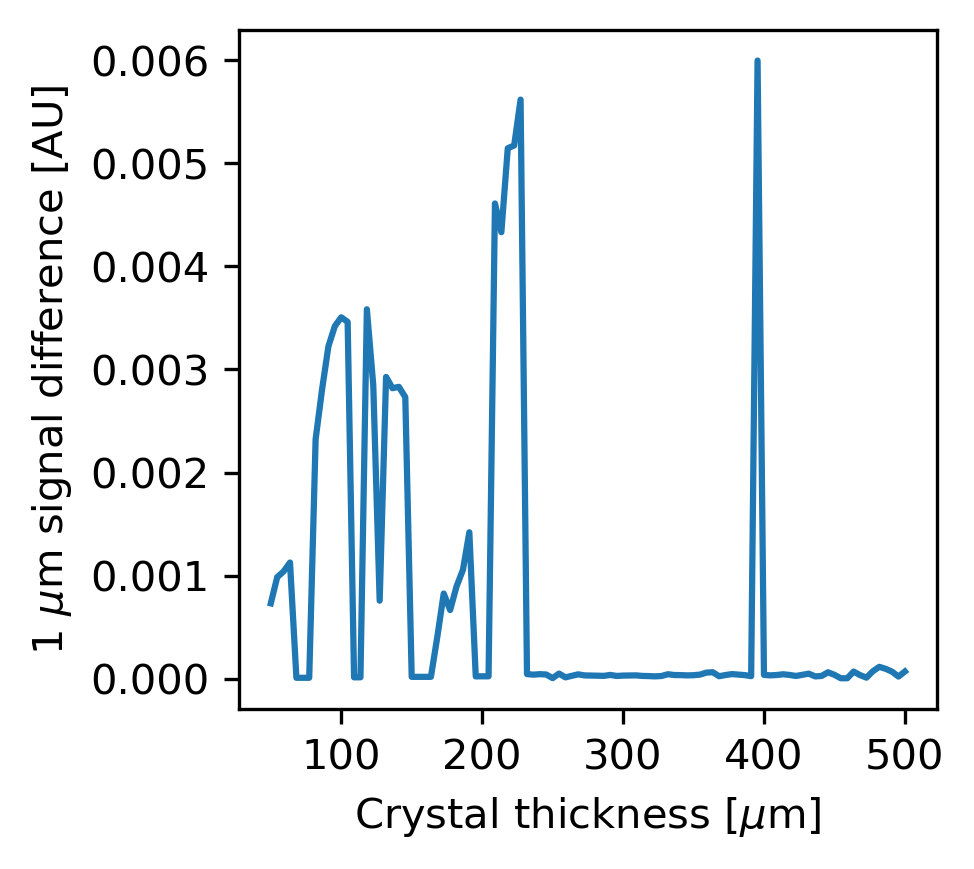

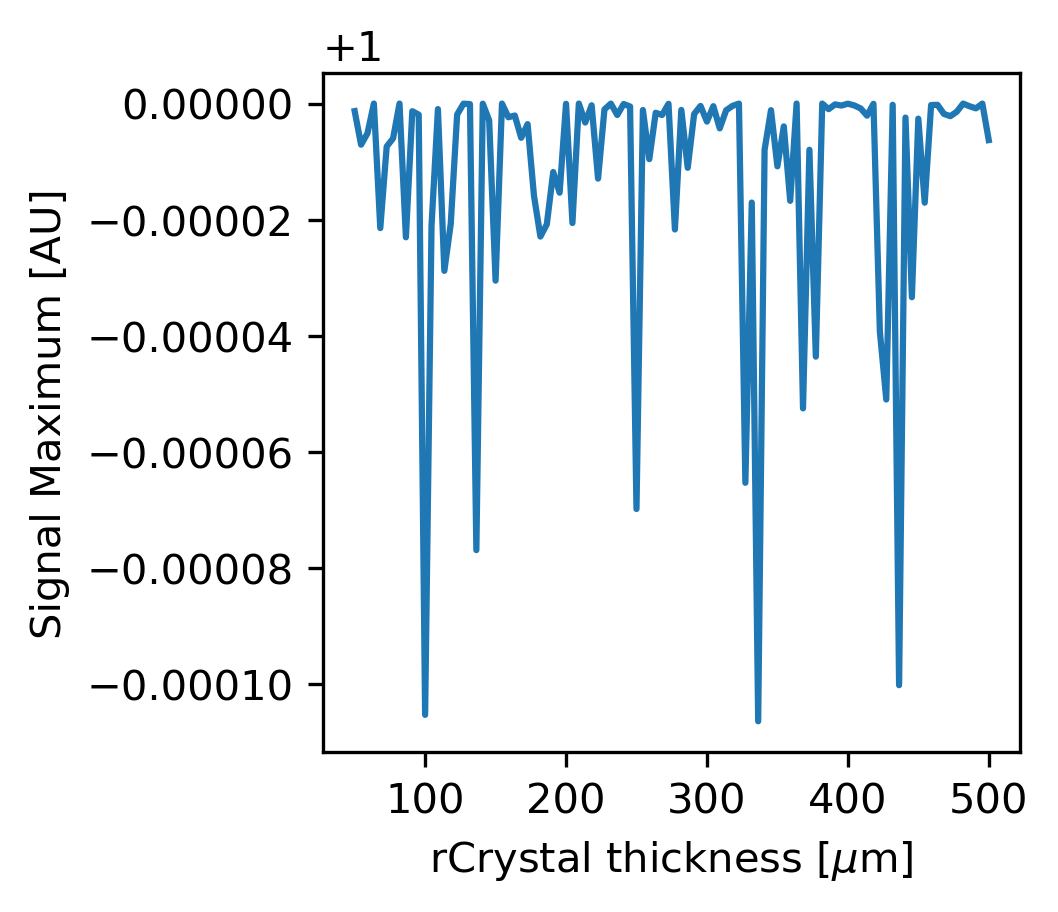

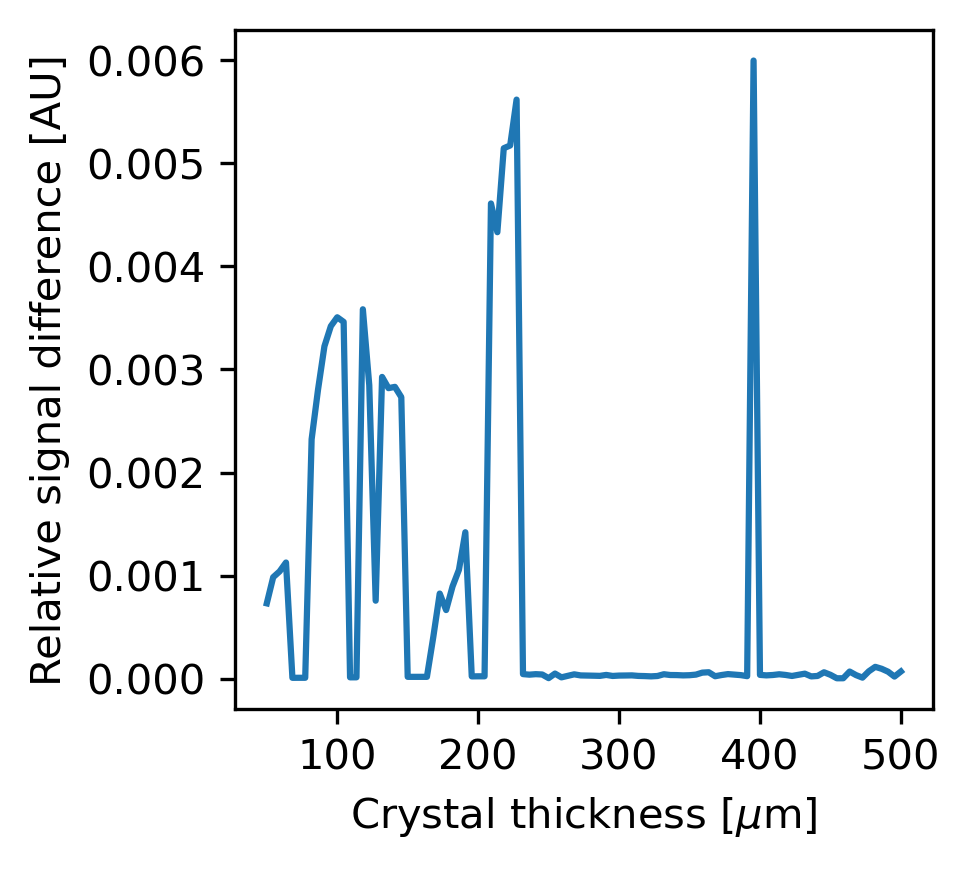

In [15]:
fig1 = plt.figure(figsize = (3, 3), dpi = 300)
ax1 = fig1.gca()
ax1.set_xlabel(r'Crystal thickness [$\mu$m]')
ax1.set_ylabel(r'1 $\mu$m signal difference [AU]')
ax1.plot(ds*1e6, sdiff)

fig2 = plt.figure(figsize = (3,3), dpi = 300)
ax2  = fig2.gca()
ax2.set_xlabel('rCrystal thickness [$\mu$m]')
ax2.set_ylabel('Signal Maximum [AU]')
ax2.plot(ds*1e6, abs(smax))

fig3 = plt.figure(figsize = (3,3), dpi = 300)
ax3 = fig3.gca()
ax3.set_xlabel(r'Crystal thickness [$\mu$m]')
ax3.set_ylabel(r'Relative signal difference [AU]')
ax3.plot(ds*1e6, sdiff/abs(smax))

plt.show()

In [23]:
sdiff[np.argmin(abs(ds - 225e-6))]

0.005174256534991453

0.2642642642642643


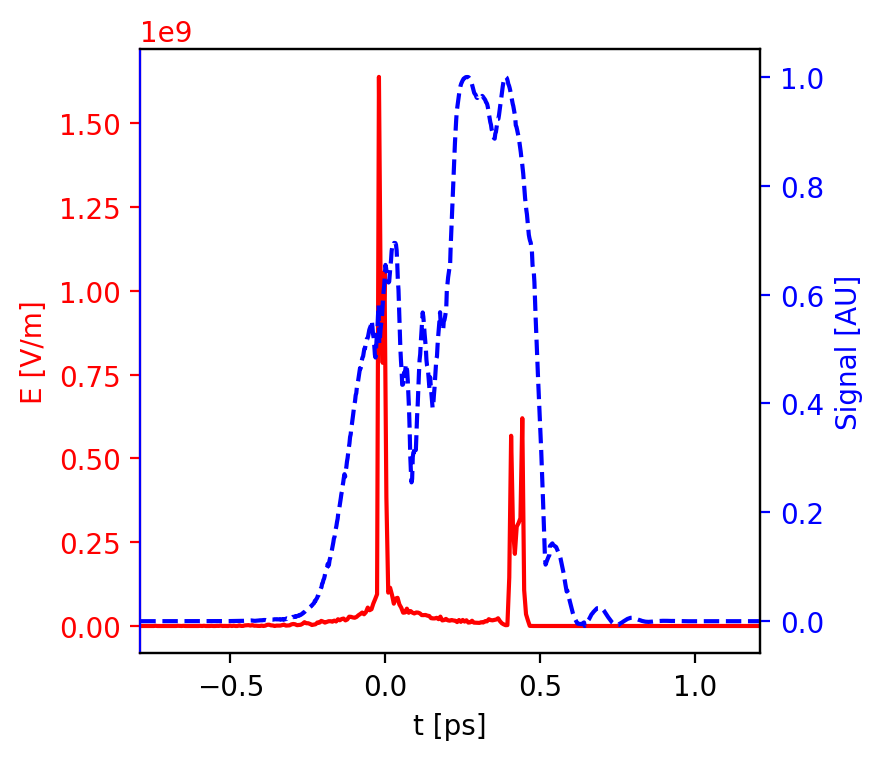

In [55]:
I, ti, p2p = cp.get_current(100, fpath)
E, te      = cp.get_E(I, ti, 1.75e-3)
gamma, tau = pr.eosd_delta(E, te, setup)
sig        = np.sin(gamma)
peaks      = cp.get_peaks(sig, tau)
tau        = tau - tau[peaks[0]]
print((tau[peaks[1]]-tau[peaks[0]])*1e12)
pl.plot_signal(E, te, np.sin(gamma), tau)

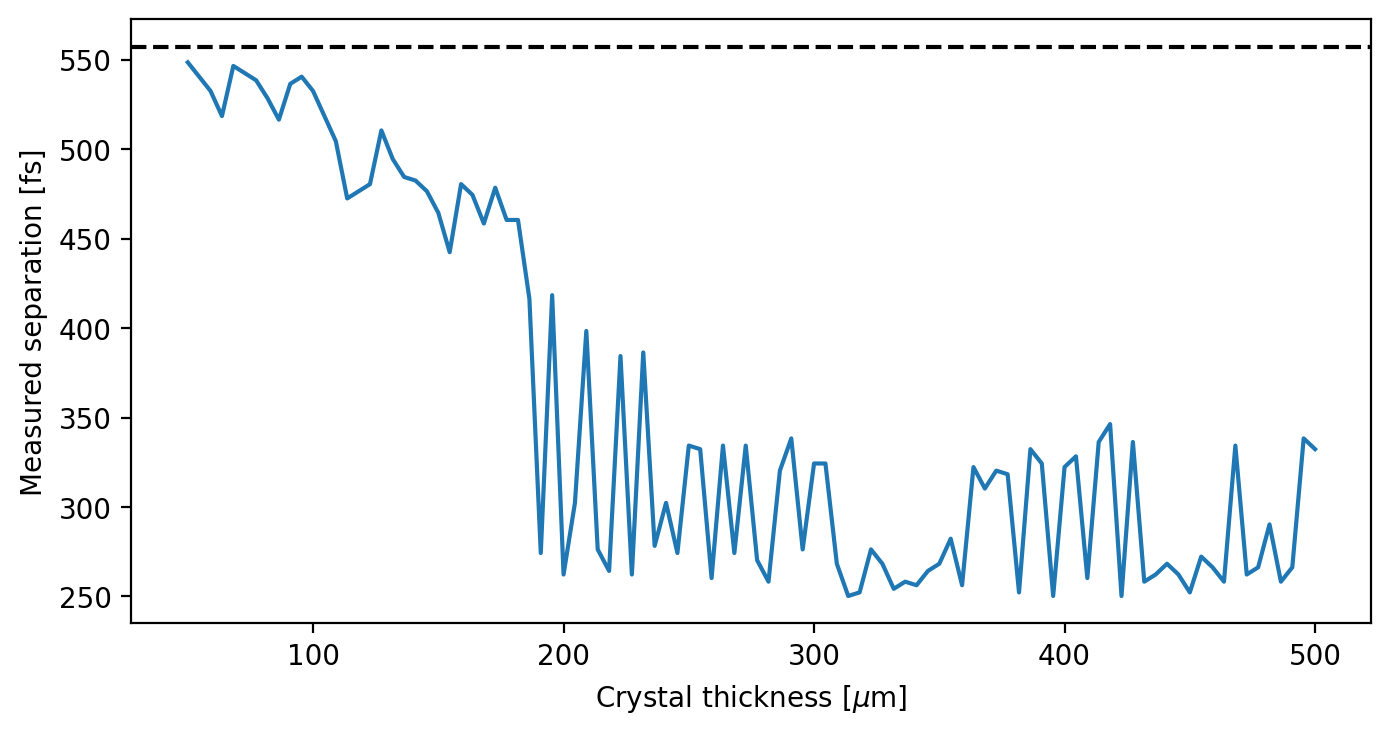

In [8]:
# Plot
fig = plt.figure(figsize = (8,4), dpi = 200)
ax1 = fig.gca()
ax1.set_ylabel("Measured separation [fs]")
ax1.set_xlabel(r'Crystal thickness [$\mu$m]')
ax1.axhline(y=p2p*1e15, color = "k", linestyle = '--', label = "Actual Separation")
ax1.plot(ds*1e6, p2ps*1e15)
plt.show()

In [4]:
# Get some stats on peak signal
N = 3135
max_g = np.zeros(N)
max_b = np.zeros(N)
max_x = np.zeros(N)
r0 = 1.5e-3
for i in range(N):
    if (i+1)%300==0:
        print(i+1, "of", N)
    I, ti, p2p = cp.get_current(i, fpath)
    E, te = cp.get_E(I, ti, r0)
    gamma, tau = pr.eosd_delta(E, te, setup)
    max_g[i] = max(gamma)
    max_b[i] = max(np.sin(gamma))
    max_x[i] = max(np.sin(0.5*gamma)*np.sin(0.5*gamma))

300 of 3135
600 of 3135
900 of 3135
1200 of 3135
1500 of 3135
1800 of 3135
2100 of 3135
2400 of 3135
2700 of 3135
3000 of 3135


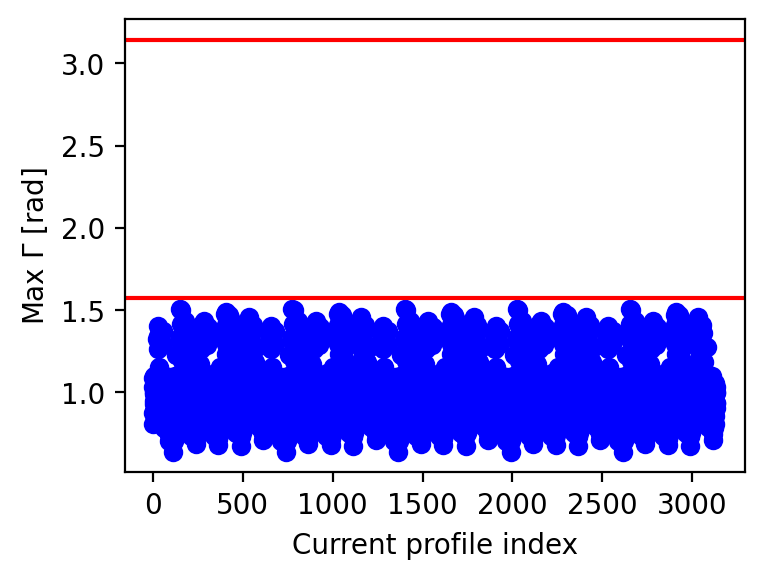

In [8]:
fig = plt.figure(figsize = (4,3), dpi=200)
ax  = fig.gca()
cind = np.linspace(0, N, N)
ax.plot(cind, max_g/1.17, 'ob')
ax.axhline(y=np.pi/2, color = "r")
ax.axhline(y=np.pi, color = "r")
#ax.plot(cind, max_x, 'rx', label = "Crossed polarizers")
ax.set_ylabel(r'Max $\Gamma$ [rad]')
ax.set_xlabel("Current profile index")
plt.show()

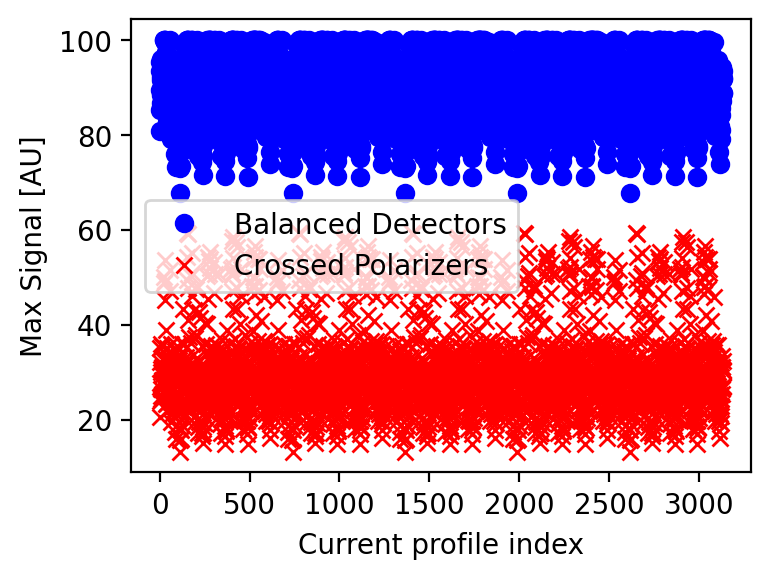

In [7]:
fig = plt.figure(figsize = (4,3), dpi=200)
ax  = fig.gca()
cind = np.linspace(0, N, N)
ax.plot(cind, 100*max_b, 'ob', label = "Balanced Detectors")
ax.plot(cind, 100*max_x, 'rx', label = "Crossed Polarizers")
ax.set_ylabel(r'Max Signal [AU]')
ax.set_xlabel("Current profile index")
ax.legend()
plt.show()

In [4]:
gamma_chirp, tau_chirp = pr.eosd_delta(E, te, setup)

In [5]:
peaks, prop = find_peaks(gamma_chirp, height = 0.15*max(gamma_chirp))
t_shift = tau_chirp[peaks[0]]
tsig    = tau_chirp - t_shift
sig     = np.sin(gamma_chirp)
sig     = sig/max(sig)

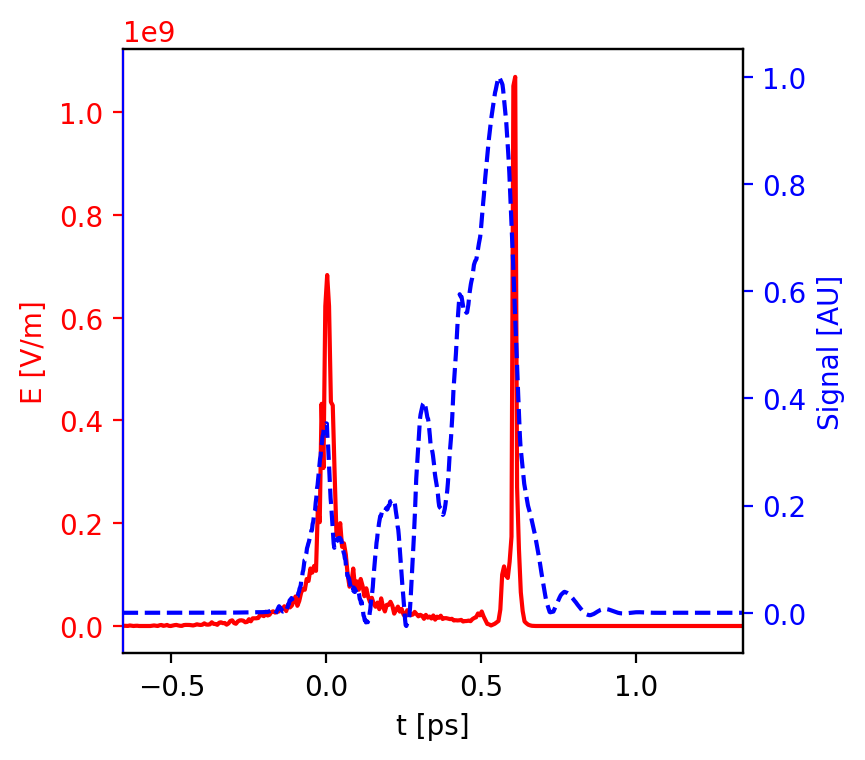

In [6]:
pl.plot_signal(E, te, sig, tsig)

In [17]:
# Functions
def getE(r):
    Q     = 1.5e-9
    sig_z = 5e-6
    sig_t = sig_z*inv_c
    dt    = sig_t*0.1
    N     = 8000
    tbeam = np.linspace(-N*0.5*dt, N*0.5*dt, N)
    E_den = (2*np.pi)**(1.5)*epsilon_0*r*c*sig_t
    E0    = Q/E_den
    Ebeam = E0*np.exp(-tbeam*tbeam/(2*sig_t*sig_t))
    return Ebeam, tbeam


def tD_eos(x_arr, y_arr, rmin, rmax):
    return
def get_com(gamma, x_arr, y_arr):
    gammax = np.sum(gamma, axis = 1)
    gammay = np.sum(gamma, axis = 0)
    tgx    = np.sum(gammax)
    tgy    = np.sum(gammay)
    comx   = np.sum(x_arr*gammax)/tgx
    comy   = np.sum(y_arr*gammay)/tgy
    return comx, comy


In [41]:
# Parameter setup
import time
tau   = np.linspace(-300, 1000, 1000)*1e-15
setup = {"ctype" : "gap",
        "d"      : 100e-6,
        "y0"     : 800e-9,
        "tp"     : 30e-15,
        "angle"  : 0,
        "method" : "cross",
        "th"     : 0,
        "nslice" : 100,
        "tau"    : tau,
        "t_delay": 0,
         "tc"    : 480e-15,
        "plot"   : True}
# Create a grid
x_step = 3.54e-4
y_step = 3.54e-4
#x_arr = np.arange(-5.5e-3, 5.5e-3+x_step,x_step)
#y_arr = np.arange(-5.5e-3, 5.5e-3+y_step, y_step)
x_arr = np.linspace(-3.5e-3, 3.5e-3, 10)
y_arr = np.linspace(-3.5e-3, 3.5e-3, 10)
# Set boundaries
r0    = 2.5e-3
rmax  = 3.0e-3
gamma = np.zeros((len(x_arr), len(y_arr)))
dx    = 0.5e-3
dy    = 0.5e-3
upd   = int(len(x_arr)*0.1)

In [42]:
start = time.time()
for i in range(len(x_arr)):
    if (i+1)%upd==0:
        print(i+1, "of", len(x_arr))
    x = x_arr[i] + dx
    for j in range(len(y_arr)):
        y = y_arr[j] + dy
        r = np.sqrt(x*x+y*y)
        if r < 2.5e-3 or r > 5e-3:
            gamma[i, j] = 0
        else:
            Ebeam, tbeam = getE(r)
            setup["r0"] = r
            gamma_chirp, tau_chirp = pr.eosd_delta(Ebeam, tbeam, setup)
            gamma[i,j] = max(gamma_chirp)

1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10


AttributeError: 'str' object has no attribute 'f'

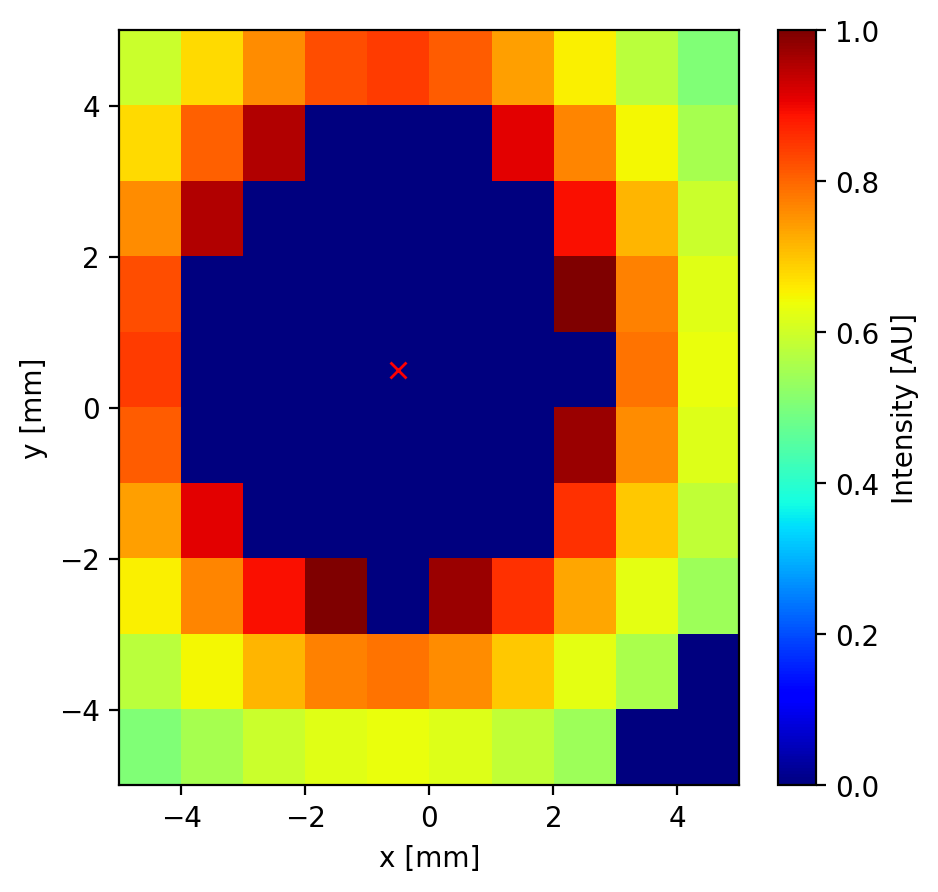

In [45]:
fig = plt.figure(figsize = (5,5), dpi = 200)
ax  = fig.gca()
ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")
ext = ([-5, 5, -5, 5])
img = ax.imshow(gamma.T/np.amax(gamma), extent = ext, aspect = "auto", cmap = "jet")
ax.plot(-dx*1e3,dy*1e3,'rx')
cbar = plt.colorbar(mappable = img)
cbar.set_label("Intensity [AU]")
plt.show()

In [9]:
def eosd_broad(E, te, setup):
    ctype    = setup["ctype"]   # crystal type
    d        = setup["d"]       # crystal thickness
    y0       = setup["y0"]      # probe central wavelength
    tp       = setup["tp"]      # probe FWHM duration
    angle    = setup["angle"]   # probe crossing angle
    r0       = setup["r0"]      # crystal beamline distance
    method   = setup["method"]  # detection method
    nslice   = setup["nslice"]  # number of crystal slices
    tau      = setup["tau"]     # Probing time array
    t_delay  = setup["t_delay"] # Artificial probe delay
    tchirp   = setup["tc"]      # Chirped pulse FWHM
    plot     = setup["plot"]    # Plotting preference (True/False)
    
    # Initialize crystal and parameters
    cry = crystal(ctype)
    # Slice the crystal
    j     = np.arange(1, nslice, 1)
    dz    = d / nslice
    d_arr = (j - 0.5) * dz
    # Initialize probe
    dy = 27e-9;
    probe = laser({'y0' : y0, 'dy' : dy, 'tp' : tp})
    probe.chirp(tchirp)
    tlim = np.sqrt(tp*tchirp)
    # Compute Effective THz pulse
    FEr, f = thz.raw_field(E, te);
    Ec, tt = thz.cry_field(te, FEr, f, d, probe, cry, nslice = nslice)
    # Convert angle to rads
    psi = angle * np.pi / 180
    # preallocate for loop
    gamma = np.zeros(len(tau))
    upd   = int(len(tau)/10)
    for i in range(len(tau)):
        if (i+1)%upd==0:
            print(i+1, "of", len(tau))
        # Get instantaneous frequency/wavelength and create a mini probe
        wi = probe.get_inst_w(tau[i])
        yi = 2*np.pi*c/wi
        mini_probe = laser({"y0" : yi, "dy" : 0, "tp" : 15e-15})
        n0   = cry.indref(np.array([mini_probe.y0]))[0]
        dz   = d_arr[1]-d_arr[0]
        amp1 = n0**3 * dz/ (mini_probe.y0)
        amp2 = probe.get_inst_amp(tau[i])
        # Get effective probe velocity
        Lchar, vg_opt = mini_probe.laser_l_char(cry)
        tau_use = tau[i] + t_delay
        for j in range(len(d_arr)):
            sigj = mini_probe.sigp*np.sqrt(1 + (d_arr[j] / Lchar)**2)
            f    = interp1d(tt*1e-12, np.real(Ec[:, j]), bounds_error = False, \
                            fill_value = 0)
            t_interp = tt*1e-12 + (d_arr[j] / vg_opt)
            E_eff = f(t_interp)
            t_delay = tau_use
            integrand = E_eff * \
                        np.exp(-(tt*1e-12 - t_delay)**2 / (2 * sigj**2)) / (sigj)
            gamma[i] += np.trapz(integrand, tt*1e-12)
        # Factor in amplitudes
        gamma[i] = amp1*amp2*gamma[i]
    # Artificially center gamma at t = 0
    tau = tau - tau[np.argmax(gamma)]
    return gamma, tau

In [25]:
tau   = np.linspace(-1000, 1000, 1000)*1e-15
setup = {"ctype" : "gap",
        "d"      : 100e-6,
        "y0"     : 800e-9,
        "tp"     : 30e-15,
        "angle"  : 0,
        "method" : "cross",
        "th"     : 0,
        "r0"     : 2.5e-3,
        "nslice" : 100,
        "tau"    : tau,
        "t_delay": 0,
        "tc"     : 480e-15,
        "plot"   : True}
E, te = cp.get_E(I, ti, 2.5e-3)

In [26]:
gamma_chirp, tau_chirp = eosd_broad(E, te, setup)

100 of 1000
200 of 1000
300 of 1000
400 of 1000
500 of 1000
600 of 1000
700 of 1000
800 of 1000
900 of 1000
1000 of 1000


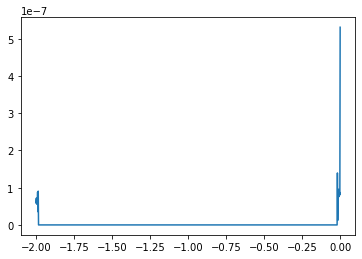

In [27]:
plt.plot(tau_chirp*1e12, gamma_chirp)
#plt.xlim([-50, 50])
plt.show()